In [64]:
!pip install protobuf==3.20.*


  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.1
    Uninstalling protobuf-6.33.1:
      Successfully uninstalled protobuf-6.33.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but 

In [15]:
!pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 120.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.0 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Unin

In [17]:
#Import needed libraries
import os, shutil
from PIL import Image, ImageOps

#Standard Libraries
import numpy as np
import pandas as pd

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay

#TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Transfer Learning
from keras.applications import ResNet50, VGG19, VGG16

In [18]:
data_AnnualCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/AnnualCrop'
data_Forest = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Forest'
data_HerbaceousVegetation = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/HerbaceousVegetation'
data_Highway = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Highway'
data_Industrial = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Industrial'
data_Pasture = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Pasture'
data_PermanentCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/PermanentCrop'
data_Residential = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Residential'
data_River = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/River'
data_SeaLake = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/SeaLake'

print("Corrected paths for RGB image categories.")

Corrected paths for RGB image categories.


In [26]:
import os

# Base EuroSAT path in Kaggle
BASE_PATH = "/kaggle/input/eurosat-rgb/EuroSAT_RGB"

# List image paths for all categories
data_AnnualCrop = f"{BASE_PATH}/AnnualCrop"
data_Forest = f"{BASE_PATH}/Forest"
data_HerbaceousVegetation = f"{BASE_PATH}/HerbaceousVegetation"
data_Highway = f"{BASE_PATH}/Highway"
data_Industrial = f"{BASE_PATH}/Industrial"
data_Pasture = f"{BASE_PATH}/Pasture"
data_PermanentCrop = f"{BASE_PATH}/PermanentCrop"
data_Residential = f"{BASE_PATH}/Residential"
data_River = f"{BASE_PATH}/River"
data_SeaLake = f"{BASE_PATH}/SeaLake"

# Output directory (you can write here in Kaggle)
new_dir = "/kaggle/working/data_rgb/split"
os.makedirs(new_dir, exist_ok=True)

print("Output directory created:", new_dir)


Output directory created: /kaggle/working/data_rgb/split


In [27]:
os.makedirs(new_dir, exist_ok=True)
print(f"Directory '{new_dir}' ensured to exist.")

Directory '/kaggle/working/data_rgb/split' ensured to exist.


In [28]:
data_AnnualCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/AnnualCrop'
data_Forest = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Forest'
data_HerbaceousVegetation = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/HerbaceousVegetation'
data_Highway = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Highway'
data_Industrial = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Industrial'
data_Pasture = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Pasture'
data_PermanentCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/PermanentCrop'
data_Residential = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Residential'
data_River = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/River'
data_SeaLake = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/SeaLake'

print("Corrected paths for RGB image categories.")

Corrected paths for RGB image categories.


In [29]:
data_AnnualCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/AnnualCrop'
data_Forest = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Forest'
data_HerbaceousVegetation = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/HerbaceousVegetation'
data_Highway = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Highway'
data_Industrial = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Industrial'
data_Pasture = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Pasture'
data_PermanentCrop = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/PermanentCrop'
data_Residential = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/Residential'
data_River = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/River'
data_SeaLake = '/content/drive/MyDrive/NIRMAN_FILES/EuroSAT_RGB/EuroSAT_RGB/SeaLake'

print("Corrected paths for RGB image categories.")

Corrected paths for RGB image categories.


In [32]:
import os

BASE_PATH = "/kaggle/input/eurosat-rgb/EuroSAT_RGB"

# Correct paths
data_AnnualCrop = f"{BASE_PATH}/AnnualCrop"
data_Forest = f"{BASE_PATH}/Forest"
data_HerbaceousVegetation = f"{BASE_PATH}/HerbaceousVegetation"
data_Highway = f"{BASE_PATH}/Highway"
data_Industrial = f"{BASE_PATH}/Industrial"
data_Pasture = f"{BASE_PATH}/Pasture"
data_PermanentCrop = f"{BASE_PATH}/PermanentCrop"
data_Residential = f"{BASE_PATH}/Residential"
data_River = f"{BASE_PATH}/River"
data_SeaLake = f"{BASE_PATH}/SeaLake"


In [33]:
imgs_AnnualCrop = [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest = [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation = [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway = [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial = [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture = [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop = [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential = [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River = [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake = [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]


In [34]:
categories = [
    'AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
    'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake'
]
splits = ['train', 'validation', 'test']

base_split_dir = new_dir # This is '/content/drive/MyDrive/NIRMAN_FILES/data_rgb/split/'

for split in splits:
    for category in categories:
        path = os.path.join(base_split_dir, split, category)
        os.makedirs(path, exist_ok=True)
        print(f"Ensured directory: {path}")

print("Created directory structure for train, validation, and test sets for all categories.")

Ensured directory: /kaggle/working/data_rgb/split/train/AnnualCrop
Ensured directory: /kaggle/working/data_rgb/split/train/Forest
Ensured directory: /kaggle/working/data_rgb/split/train/HerbaceousVegetation
Ensured directory: /kaggle/working/data_rgb/split/train/Highway
Ensured directory: /kaggle/working/data_rgb/split/train/Industrial
Ensured directory: /kaggle/working/data_rgb/split/train/Pasture
Ensured directory: /kaggle/working/data_rgb/split/train/PermanentCrop
Ensured directory: /kaggle/working/data_rgb/split/train/Residential
Ensured directory: /kaggle/working/data_rgb/split/train/River
Ensured directory: /kaggle/working/data_rgb/split/train/SeaLake
Ensured directory: /kaggle/working/data_rgb/split/validation/AnnualCrop
Ensured directory: /kaggle/working/data_rgb/split/validation/Forest
Ensured directory: /kaggle/working/data_rgb/split/validation/HerbaceousVegetation
Ensured directory: /kaggle/working/data_rgb/split/validation/Highway
Ensured directory: /kaggle/working/data_rgb

In [35]:
train_ratio = 0.7
validation_ratio = 0.20
test_ratio = 0.10

# Dictionary mapping category names to their respective image lists and original data paths
category_data = {
    'AnnualCrop': {'imgs': imgs_AnnualCrop, 'path': data_AnnualCrop},
    'Forest': {'imgs': imgs_Forest, 'path': data_Forest},
    'HerbaceousVegetation': {'imgs': imgs_HerbaceousVegetation, 'path': data_HerbaceousVegetation},
    'Highway': {'imgs': imgs_Highway, 'path': data_Highway},
    'Industrial': {'imgs': imgs_Industrial, 'path': data_Industrial},
    'Pasture': {'imgs': imgs_Pasture, 'path': data_Pasture},
    'PermanentCrop': {'imgs': imgs_PermanentCrop, 'path': data_PermanentCrop},
    'Residential': {'imgs': imgs_Residential, 'path': data_Residential},
    'River': {'imgs': imgs_River, 'path': data_River},
    'SeaLake': {'imgs': imgs_SeaLake, 'path': data_SeaLake}
}

base_split_dir = new_dir

print("Starting data splitting and copying...")

for category, data in category_data.items():
    all_images = data['imgs']
    original_path = data['path']
    np.random.shuffle(all_images) # Shuffle images for random splitting

    num_images = len(all_images)
    num_train = int(train_ratio * num_images)
    num_validation = int(validation_ratio * num_images)

    train_images = all_images[:num_train]
    validation_images = all_images[num_train : num_train + num_validation]
    test_images = all_images[num_train + num_validation:]

    # Copy images to respective directories
    for img in train_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'train', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(train_images)} images to train/{category}")

    for img in validation_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'validation', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(validation_images)} images to validation/{category}")

    for img in test_images:
        src = os.path.join(original_path, img)
        dst = os.path.join(base_split_dir, 'test', category, img)
        shutil.copyfile(src, dst)
    print(f"Copied {len(test_images)} images to test/{category}")

print("Data splitting and copying complete.")

Starting data splitting and copying...
Copied 2100 images to train/AnnualCrop
Copied 600 images to validation/AnnualCrop
Copied 300 images to test/AnnualCrop
Copied 2100 images to train/Forest
Copied 600 images to validation/Forest
Copied 300 images to test/Forest
Copied 2100 images to train/HerbaceousVegetation
Copied 600 images to validation/HerbaceousVegetation
Copied 300 images to test/HerbaceousVegetation
Copied 1750 images to train/Highway
Copied 500 images to validation/Highway
Copied 250 images to test/Highway
Copied 1750 images to train/Industrial
Copied 500 images to validation/Industrial
Copied 250 images to test/Industrial
Copied 1400 images to train/Pasture
Copied 400 images to validation/Pasture
Copied 200 images to test/Pasture
Copied 1750 images to train/PermanentCrop
Copied 500 images to validation/PermanentCrop
Copied 250 images to test/PermanentCrop
Copied 2100 images to train/Residential
Copied 600 images to validation/Residential
Copied 300 images to test/Residenti

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)


In [46]:
train_generator = train_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(256,256),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)


Found 21600 images belonging to 10 classes.


In [47]:
val_generator = train_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(256,256),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)


Found 5400 images belonging to 10 classes.


In [48]:
test_generator = test_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(256,256),
    batch_size=128,
    class_mode='categorical'
)


Found 27000 images belonging to 10 classes.


In [49]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)


In [50]:
#Confirm class balance for train and test
train_classes = train_generator.classes
val_classes = val_generator.classes
test_classes = test_generator.classes

#Look at image distribution by class across train, test, and validation sets.
train_class, train_count = np.unique(train_classes, return_counts=True)
val_class, val_count = np.unique(val_classes, return_counts=True)
test_class, test_count = np.unique(test_classes, return_counts=True)

print('Train ~ {}'.format(list(zip(train_class, train_count))))
print('Validation ~ {}'.format(list(zip(val_class, val_count))))
print('Test ~ {}'.format(list(zip(test_class, test_count))))

Train ~ [(0, 2400), (1, 2400), (2, 2400), (3, 2000), (4, 2000), (5, 1600), (6, 2000), (7, 2400), (8, 2000), (9, 2400)]
Validation ~ [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]
Test ~ [(0, 3000), (1, 3000), (2, 3000), (3, 2500), (4, 2500), (5, 2000), (6, 2500), (7, 3000), (8, 2500), (9, 3000)]


In [51]:
#Checking the classes in our train data
train_class_names = train_generator.class_indices
print('Train:', train_class_names)

#Checking the classes in our validation data
val_class_names = val_generator.class_indices
print('Validation:', val_class_names)

#Checking the classes in our test data
test_class_names = test_generator.class_indices
print('Train:', test_class_names)

Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [52]:
# Preview the shape of both the images and labels for both the train, validation, and test sets (8 objects total)
print("Train")
print(np.shape(train_images))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_images))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_images))
print(np.shape(test_labels))

Train
(128, 256, 256, 3)
(128, 10)
Validation
(128, 256, 256, 3)
(128, 10)
Test
(128, 256, 256, 3)
(128, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


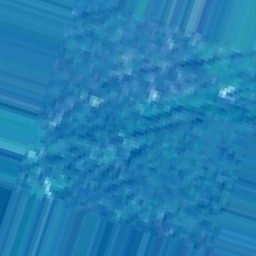

In [53]:
# Preview a train data image
print(train_labels[0])
array_to_img(train_images[0])

In [54]:
#Instantiate a Sequential model
baseline_model = Sequential()


# Input Layer- Convolution
baseline_model.add(Conv2D(filters=32,
                          kernel_size=(3, 3),
                          activation='relu',
                          input_shape= (256, 256, 3)))


# Layer 1- max pool in 2x2 window
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2- connect all nodes with dense layer
baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

# Output Layer- softmax activiation for multi-categorical with 10 classes
baseline_model.add(Dense(10, activation='softmax'))

#Compile the sequential CNN model- adam optimizer,
# categorical_crossentropy loss, and set our metric to accuracy
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  kernel_constraint=None,
I0000 00:00:1764423020.516252      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764423020.516880      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    33,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,033,802 (126.01 MB)

 Trainable params: 33,033,802 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# ============================
# 🚀 TRAIN THE MODEL
# ============================

baseline_history = baseline_model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data=val_generator
)


# ============================
# 📊 EVALUATE ON TEST DATA
# ============================

test_loss, test_acc = baseline_model.evaluate(
    test_generator,
    verbose=1
)

print("=================================")
print("📌 FINAL TEST RESULTS")
print("Test Loss     :", test_loss)
print("Test Accuracy :", test_acc)
print("=================================")


Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.3682 - loss: 1.7521 - val_accuracy: 0.4359 - val_loss: 1.5956
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.4483 - loss: 1.5634 - val_accuracy: 0.5033 - val_loss: 1.4071
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.5093 - loss: 1.3783 - val_accuracy: 0.5656 - val_loss: 1.2323
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.5627 - loss: 1.2273 - val_accuracy: 0.6391 - val_loss: 0.9985
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.6174 - loss: 1.0555 - val_accuracy: 0.6563 - val_loss: 0.9568
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.6398 - loss: 0.9994 - val_accuracy: 0.6380 - val_loss: 1.0309
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.6494 - loss: 0.9797 - val_accuracy: 0.6444 - val_loss: 0.9329
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.6670 - loss: 0.9167 - val_accu

In [57]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# =============================================
# 📌 1. SET CORRECT KAGGLE PATHS
# =============================================

# These are your PRE-SPLIT folders
train_folder = "/kaggle/working/data_rgb/split/train"
test_folder  = "/kaggle/working/data_rgb/split/test"

# If folders don't exist, show a warning
print("Train folder exists:", os.path.exists(train_folder))
print("Test folder exists:", os.path.exists(test_folder))


# =============================================
# 📌 2. IMAGE AUGMENTATION + NORMALIZATION
# =============================================

train_aug16_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.125   # 12.5% of TRAIN becomes validation
)

val_aug16_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.125
)

test_aug16_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)


# =============================================
# 📌 3. CREATE FLOW FROM DIRECTORY
# =============================================

# ---- TRAIN GENERATOR (87.5% of train folder) ----
aug16_train_generator = train_aug16_gen.flow_from_directory(
    train_folder,
    class_mode='categorical',
    subset='training',
    batch_size=128,
    shuffle=True,
    seed=42
)

# ---- VALIDATION (12.5% of train folder) ----
aug16_val_generator = val_aug16_gen.flow_from_directory(
    train_folder,
    class_mode='categorical',
    subset='validation',
    batch_size=128,
    shuffle=True,
    seed=42
)

# ---- TEST GENERATOR (from test folder) ----
aug16_test_generator = test_aug16_gen.flow_from_directory(
    test_folder,
    class_mode='categorical',
    batch_size=128,
    shuffle=False,
    seed=42
)


Train folder exists: True
Test folder exists: True
Found 16543 images belonging to 10 classes.
Found 2357 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [58]:
#Reshape our input
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
#Instantiate a Sequential model
aug_vgg16_model = Sequential()

#Input Layer
aug_vgg16_model.add(vgg16)

aug_vgg16_model.add(layers.Flatten())

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(512, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(64, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Output Layer
aug_vgg16_model.add(layers.Dense(10, activation='softmax'))



# View number of layers in the vgg16 base model
print("Number of layers in the VGG16 base model: ", len(vgg16.layers))

Number of layers in the VGG16 base model:  19


In [60]:
# Fine-tune from layer 15 onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer*
for layer in vgg16.layers[:fine_tune_at]:
  layer.trainable = False

In [61]:
#Sanity check that VGG19 Layer is frozen
for layer in aug_vgg16_model.layers:
    print(layer.name, layer.trainable)

vgg16 True
flatten_1 True
dense_2 True
dropout True
dense_3 True
dropout_1 True
dense_4 True


In [62]:
#Check that there is no prediction layer and the split between trainable/non-trainable parameters.
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [65]:
#Compile the model- adam optimizer, categorical_crossentropy loss, and set our metric to accuracy
aug_vgg16_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# print model summary
aug_vgg16_model.summary()




# Define Stopping Criteria- changed patience to 10
valcallback = [EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 10),
               ModelCheckpoint(
    filepath="/kaggle/working/aug_vgg16_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max"
)
]


# Fit the model
aug_vgg16_model_history = aug_vgg16_model.fit(aug16_train_generator,
                                  epochs= 10,
                                  validation_data = aug16_val_generator,
                                  callbacks= valcallback,
                                  batch_size=128,
                                  verbose = 1)




# Check loss and accuracy on test data
test_loss, test_acc = aug_vgg16_model.evaluate(aug16_test_generator, verbose = 1)

print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,525,898 (120.26 MB)

 Trainable params: 23,890,634 (91.14 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6859 - loss: 0.8907

130/130 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.6861 - loss: 0.8902 - val_accuracy: 0.6962 - val_loss: 0.8832
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7306 - loss: 0.7574

130/130 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7306 - loss: 0.7574 - val_accuracy: 0.7242 - val_loss: 0.7642
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7553 - loss: 0.6944

130/130 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7553 - loss: 0.6944 - val_accuracy: 0.7493 - val_loss: 0.6837
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7734 - loss: 0.6385

130/130 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7734 - loss: 0.6386 - val_accuracy: 0.7896 - val_loss: 0.6351
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.7919 - loss: 0.6086 - val_accuracy: 0.7756 - val_loss: 0.6778
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8055 - loss: 0.5763

130/130 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8055 - loss: 0.5763 - val_accuracy: 0.8087 - val_loss: 0.6124
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8167 - loss: 0.5387

130/130 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.8167 - loss: 0.5387 - val_accuracy: 0.8456 - val_loss: 0.4590
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8284 - loss: 0.5151 - val_accuracy: 0.8392 - val_loss: 0.4956
Epoch 9/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8443 - loss: 0.4895

130/130 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8443 - loss: 0.4895 - val_accuracy: 0.8659 - val_loss: 0.4124
Epoch 10/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8409 - loss: 0.4663 - val_accuracy: 0.8468 - val_loss: 0.4601
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8571 - loss: 0.4809
Test loss:  0.4651601314544678
Test accuracy:  0.851111114025116


In [67]:
aug_vgg16_model.save("/kaggle/working/birds_model.keras")
